In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2024-08-30 22:26:29.973276: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/moz/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in     train_data[0]]) 

In [9]:
train_labels[10]

3

In [11]:
import numpy as np 
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension))   
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.                        
    return results

In [12]:
x_train = vectorize_sequences(train_data)      
x_test = vectorize_sequences(test_data) 

In [13]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1. 
    return results
y_train = to_one_hot(train_labels)     
y_test = to_one_hot(test_labels)  

In [14]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


In [15]:
from tensorflow import keras 
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [16]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [17]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 40ms/step - loss: 2.8294 - accuracy: 0.5075 - val_loss: 1.9306 - val_accuracy: 0.5950
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.5741 - accuracy: 0.6654 - val_loss: 1.4049 - val_accuracy: 0.6890
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.1793 - accuracy: 0.7423 - val_loss: 1.2262 - val_accuracy: 0.7180
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.9697 - accuracy: 0.7905 - val_loss: 1.0966 - val_accuracy: 0.7540
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.8040 - accuracy: 0.8302 - val_loss: 1.0207 - val_accuracy: 0.7740
Epoch 6/20
16/16 [==============================] - 1s 35ms/step - loss: 0.6802 - accuracy: 0.8524 - val_loss: 0.9549 - val_accuracy: 0.8030
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5619 - accuracy: 0.8779 - val_loss: 0.9382 - val_accuracy: 0.8000
Epoch 8/20
16

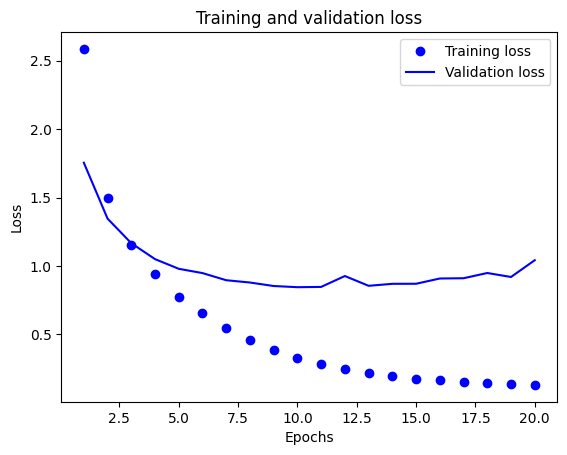

In [ ]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

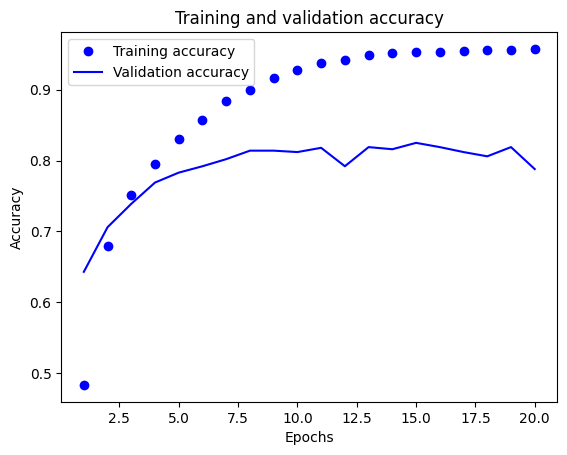

In [ ]:
plt.clf()                          
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 17ms/step - loss: 2.8162 - accuracy: 0.5011
Epoch 2/9
18/18 [==============================] - 0s 16ms/step - loss: 1.5579 - accuracy: 0.6838
Epoch 3/9
18/18 [==============================] - 0s 14ms/step - loss: 1.1777 - accuracy: 0.7533
Epoch 4/9
18/18 [==============================] - 0s 18ms/step - loss: 0.9489 - accuracy: 0.7984
Epoch 5/9
18/18 [==============================] - 0s 18ms/step - loss: 0.7801 - accuracy: 0.8369
Epoch 6/9
18/18 [==============================] - 0s 20ms/step - loss: 0.6480 - accuracy: 0.8648
Epoch 7/9
18/18 [==============================] - 0s 22ms/step - loss: 0.5431 - accuracy: 0.8871
Epoch 8/9
18/18 [==============================] - 0s 18ms/step - loss: 0.4588 - accuracy: 0.9034
Epoch 9/9
71/71 [==============================] - 0s 4ms/step - loss: 0.9282 - accuracy: 0.7894


In [ ]:
import copy

In [ ]:
test_labels_copy = copy.copy(test_labels)

In [ ]:
np.random.shuffle(test_labels_copy)

In [ ]:
hits_array = np.array(test_labels) == np.array(test_labels_copy)

In [ ]:
hits_array.mean()

0.1834372217275156

In [ ]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

0.99999994

In [ ]:
np.argmax(predictions[0])

3